# Step by Step: Binary Classification Neural Network
This notebook is designed to go through the theory for a Neural Network to be able to accomplish binary classification (i.e. the data falls into a group or not) so there is only one output node.

Recommended: you should know the basics of Neural Networks, Calculus (differentation, chain rule), gradient descent and backpropagation - to name a few.

## Neural Network Architecture
To begin with, we'll work with a 2-layer network with 2 input nodes, 3 hidden nodes and 1 output node:

![Img Alt Text](2-layer-binary-network.png)

Each layer has an extra node (which we don't count) which acts as the bias. Here are the explanations for the syntaxes I will be using:
- $a^{(L)}_j$ represents the $j$th activation node from the top (index 0) in layer $L$.
- $w^{(L)}_{j,k}$ represents the weight connecting $a^{(L-1)}_k$ and $a^{(L)}_j$.
- $n_L$ represents the number of nodes in layer $L$.

## Activation Function
For the activation function, I'll be using the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function):
<br><br>
<center>
    <font size='4'>
        $
        a^{(L)}_j=\sigma(z^{(L)}_j)
        $
    </font>
</center>
Where,
<center>
    <font size='4'>
        $\sigma(x)=$
        <font size='5'>
            $\frac{1}{1+e^{-x}}$
        </font>
        <font size='3'>
            and
        </font>
        $z^{(L)}_j=(\sum_k^{n_{L-1}}a^{(L-1)}_kw^{(L)}_{j,k})+b^{(L)}_j$
    </font>
</center>


## Cost Function
For the cost function, I'll be using the [Cross-Entropy function](https://en.wikipedia.org/wiki/cross-entropy) function:
<br><br>
<center>
    <font size='4'>
        $C=-\sum_{i}^C y_i\log{(\hat{y}_i)}$
    </font>
</center>

Where,
- $C$ is the number of classes (in this case $C=2$)
- $y_i$ is the expected output
- $\hat{y}_i$ is the predicted output  

For a binary classification task (i.e. $C=2$), the cross-entropy loss function becomes:

<font size="4"><center>$C=-\sum_{i=1}^2 y_1\log{(\hat{y})}=-y_1\log{(\hat{y}_1)}-(1-y_1)\log{(1-\hat{y}_1)}$</center></font>

## Dealing with Matrices
The syntaxing for the weights may be confusing but is helpful when put into matrix format (this is done because it's much easier to manipulate matrices rather than every parameter individually).

The values from the nodes in each layer can be represented as vectors. We add the value $1$ to the vector which acts as the bias node in that layer.  
Let,
<br><br>
<center>
    <font size='4'>
        $
        X=
        \begin{pmatrix}
            x_0 \\
            x_1
        \end{pmatrix}
        $ ,  
        $
        W^{(1)}=
        \begin{pmatrix}
            w^{(1)}_{0,0} &w^{(1)}_{0,1} \\
            w^{(1)}_{1,0} &w^{(1)}_{1,1} \\
            w^{(1)}_{2,0} &w^{(1)}_{2,1} \\
        \end{pmatrix}
        $ , 
        $
        B^{(1)}=
        \begin{pmatrix}
            b^{(1)}_0 \\
            b^{(1)}_1 \\
            b^{(1)}_2
        \end{pmatrix}
        $
    </font>
</center>
<br><br>
Then,
<center>
    <font size='4'>
        $
        W^{(1)}X+B^{(1)}=
        \begin{pmatrix}
            w^{(1)}_{0,0}x_0+w^{(1)}_{0,1}x_1+b^{(1)}_0 \\
            w^{(1)}_{1,0}x_0+w^{(1)}_{1,1}x_1+b^{(1)}_1 \\
            w^{(1)}_{2,0}x_0+w^{(1)}_{2,1}x_1+b^{(1)}_2
        \end{pmatrix}
        =
        \begin{pmatrix}
            z^{(1)}_0 \\
            z^{(1)}_1 \\
            z^{(1)}_2
        \end{pmatrix}
        =Z^{(1)}
        $
        <br><br>
        $
        A^{(1)}=\sigma(Z^{(1)})=
        \begin{pmatrix}
            \sigma(z^{(1)}_0) \\
            \sigma(z^{(1)}_1) \\
            \sigma(z^{(1)}_2)
        \end{pmatrix}
        =
        \begin{pmatrix}
            a^{(1)}_0 \\
            a^{(1)}_1 \\
            a^{(1)}_2
        \end{pmatrix}
        $
    </font>
</center>
<br><br>
Similarly, this is done for the next layer:
<center>
    <font size='4'>
        $
        A^{(1)}=
        \begin{pmatrix}
            a^{(1)}_0 \\
            a^{(1)}_1 \\
            a^{(1)}_2
        \end{pmatrix}
        $ , 
        $
        W^{(2)}=
        \begin{pmatrix}
            w^{(2)}_{0,0} &w^{(2)}_{0,1} &w^{(2)}_{0,2}
        \end{pmatrix}
        $ , 
        $
        B^{(2)}=
        \begin{pmatrix}
            b^{(2)}_0
        \end{pmatrix}
        $
    </font>
</center>
<br><br>
Then,
<center>
    <font size='4'>
        $
        W^{(2)}A^{(1)}+B^{(2)}=
        \begin{pmatrix}
            w^{(2)}_{0,0}a^{(1)}_0 + w^{(2)}_{0,1}a^{(1)}_1 + w^{(2)}_{0,2}a^{(1)}_2 + b^{(2)}_0
        \end{pmatrix}
        =
        \begin{pmatrix}
            z^{(2)}_0
        \end{pmatrix}
        = Z^{(2)}
        $
        <br><br>
        $
        A^{(2)}=\sigma(Z^{(2)})=(\sigma(z^{(2)}_0))=(a^{(2)}_0)
        $
    </font>
</center>
<br><br>
For this example, $a^{(2)}_0$ is the predicted output, which is then passed onto the loss function.

## Backpropagation
The goal with any model is to minimise the cost function. In this case, we need to adjust all weights and biases to minimise the cross-entropy loss function - for this, we use gradient descent:  
<br><br>
<center>
    Repeat until convergence:
    <font size='4'>
        $\{w_j:=w_j-\alpha\frac{\delta}{\delta w_j}J(w_0, w_1, ..., w_n)\}$
    </font>
</center>


Where $\alpha$ is the **learning rate** and is typically quite small.

By the chain rule, we know:
<center>
    <font size='5'>
        $
        \frac{\delta C}{\delta w^{(2)}_{0,k}}=\frac{\delta C}{\delta a^{(2)}_0}\frac{\delta a^{(2)}_0}{\delta z^{(2)}_0}\frac{\delta z^{(2)}_0}{\delta w^{(2)}_{0,k}}
        $
        <br><br>
        $
        \frac{\delta C}{\delta b^{(2)}_j}=\frac{\delta C}{\delta a^{(2)}_0}\frac{\delta a^{(2)}_0}{\delta z^{(2)}_0}\frac{\delta z^{(2)}_0}{\delta b^{(2)}_j}
        $
        <br><br>
        $
        \frac{\delta C}{\delta w^{(1)}_{j,k}}=\frac{\delta C}{\delta a^{(2)}_0}\frac{\delta a^{(2)}_0}{\delta z^{(2)}_0}\frac{\delta z^{(2)}_0}{\delta a^{(1)}_j}\frac{\delta a^{(1)}_j}{\delta z^{(1)}_j}\frac{\delta z^{(1)}_j}{\delta w^{(1)}_{j,k}}
        $
    </font>
</center>
<br><br>
Now we must find all these derivatives (the hard part), then we can update the weights and biases. We'll do the derivatives in stages:

### 1. Cost Function
<center>
    <font size='4'>
        $
        C=-y\log{(a^{(2)}_0)}-(1-y)\log{(1-a^{(2)}_0)}
        $
    </font>
    <br><br>
    <font = size='5'>
        $\frac{\delta C}{\delta a^{(2)}_0}$
        <font size='4'>$=$</font>
        $\frac{-y}{a^{(2)}_0}$
        <font size='4'>$+$</font>
        $\frac{1-y}{1-a^{(2)}_0}$
    </font>
</center>

### 2. Activation Function
The derivation of the sigmoid function can be found [online](https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e).
<center>
    <font size='4'>
        $
        a^{(2)}_0=\sigma(z^{(2)}_0)
        $
    </font>
    <br><br>
    <font size='5'>
        $\frac{\delta a^{(2)}_0}{\delta z^{(2)}_0}$
        <font size='4'>
            $=\sigma(z^{(2)}_0)(1-\sigma(z^{(2)}_0))$
        </font>
    </font>
</center>

### 3a. Derivative of $z^{(L)}_j$ w.r.t Weight
<center>
    <font size='4'>
        $z^{(L)}_j=(\sum_{k=0}^{n_{L-1}}a^{(L-1)}_kw^{(L)}_{j,k})+b^{(L)}_j$
        <br><br>
        <font size='5'>$\frac{\delta z^{(L)}_j}{\delta w^{(L)}_{j,k}}$</font>
        $=a^{(L-1)}_k$
    </font>
</center>

### 3b. Derivative of $z^{(L)}_j$ w.r.t Bias
<center>
    <font size='4'>
        $z^{(L)}_j=(\sum_{k=0}^{n_{L-1}}a^{(L-1)}_kw^{(L)}_{j,k})+b^{(L)}_j$
        <br><br>
        <font size='5'>$\frac{\delta z^{(L)}_j}{\delta b^{(L)}_j}$</font>
        $=1$
    </font>
</center>

### 4. Other
<center>
    <font size='4'>
        $z^{(L)}_j=(\sum_{k=0}^{n_{L-1}}a^{(L-1)}_kw^{(L)}_{j,k})+b^{(L)}_j$
        <br><br>
        <font size='5'>$\frac{\delta z^{(L)}_j}{\delta a^{(L-1)}_k}$</font>
        $=w^{(L)}_{j,k}$
    </font>
</center>

# Example Data
Let's make some sample data to use to walkthrough training the neural network. Remember there are only two inputs and one output.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
np.random.seed(42)

n_group1 = 100
n_group2 = 100

# create arrays holding 2 features (x,y)
group_1 = np.random.randn(n_group1,2) + np.array([-3, 0])
group_2 = np.random.randn(n_group2,2) + np.array([3, 0])
all_groups = np.vstack([group_1, group_2])

In [51]:
df = pd.DataFrame(data=all_groups, columns=['x','y'])

In [52]:
labels = np.array([0]*n_group1 + [1]*n_group2)
df['group'] = labels

In [53]:
df

,x,y,group
0,-2.503286,-0.138264,0
1,-2.352311,1.523030,0
2,-3.234153,-0.234137,0
3,-1.420787,0.767435,0
4,-3.469474,0.542560,0
...,...,...,...
195,2.101585,0.491919,1
196,1.679767,1.831459,1
197,4.179440,-0.469176,1
198,1.286865,1.353872,1


(Text(0.5, 0, 'x'), Text(0, 0.5, 'y'), Text(0.5, 1.0, 'Data'))

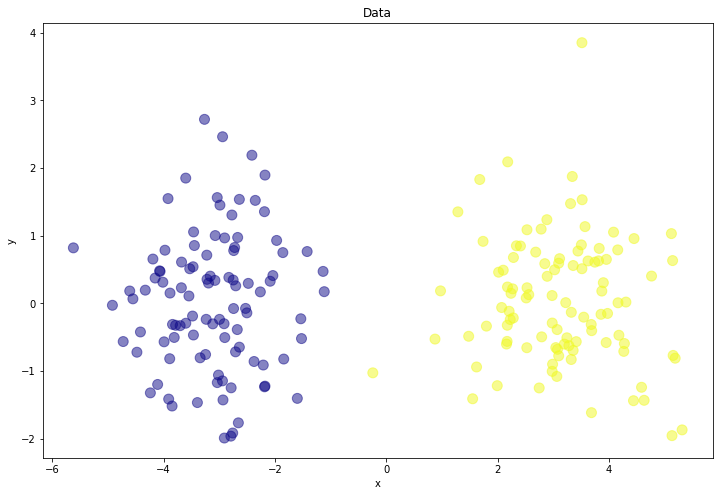

In [54]:
plt.figure(figsize=(12,8))
plt.scatter(all_groups[:,0], all_groups[:,1], c=labels, cmap='plasma', s=100, alpha=0.5)
plt.xlabel('x'), plt.ylabel('y'), plt.title('Data')

Now we've made a bunch of datapoints as a training set. Each datapoint has two features: `x` and `y` (or you can think of these as `x0` and `x1`). Each datapoint in the training set is assigned to one of two groups: blue or yellow (or group_1 and group_2).

## Forward Propagation
To initalise all the weights and biases we'll use the [standard Normal distribution](https://en.wikipedia.org/wiki/Normal_distribution#Standard_normal_distribution) so that each weight is a small enough random number. We don't initalise the values to be 0 because then the learning would break.

In [251]:
# define layers/nodes architecture
layers = [2,3,1]
params = {}  # to store all parameters
learning_rate = 0.001

# initialise matrices of weights and biases for layer 1
params['W1'] = np.random.randn(layers[0], layers[1]) #2x3
params['B1'] = np.random.randn(layers[1]) #1x3

# initialise matrices of weights and bias for layer 2
params['W2'] = np.random.randn(layers[1], layers[2]) #3x1
params['B2'] = np.random.randn(layers[2]) #1x1

# get training example
X = all_groups #nx2  (n=200)

In [252]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

In [253]:
def forward_propagate():
    # get Z1
    params['Z1'] = X.dot(params['W1'])+params['B1']

    # get A1 by applying the sigmoid function to each element in Z1
    params['A1'] = sigmoid(params['Z1'])

    # get Z2
    params['Z2'] = params['A1'].dot(params['W2'])+params['B2']

    # get A2 (predicted output)
    params['A2'] = sigmoid(params['Z2'])

In [254]:
forward_propagate()

## Backpropagation
Now we've gone through the network once, we now need to evaluate the loss/cost, and then adjust each parameter such that the cost is minimised.

In [255]:
def eta(x):
    ETA = 0.0000000001
    return np.maximum(x, ETA)

def entropy_loss(y, yhat):
    nsample = len(y)
    y_inv = 1.0 - y
    yhat_inv = 1.0 - yhat
    
    # clips value to avoid NaNs in log
    yhat = eta(yhat)
    yhat_inv = eta(yhat_inv)

    loss = -1/nsample * (np.sum(
        np.multiply(y, np.log(yhat)) + 
        np.multiply(y_inv, np.log(yhat_inv))
    ))
    return loss

def dSigmoid(X):
    return sigmoid(X) * (1-sigmoid(X))

In [256]:
entropy_loss(labels, params['A2'])

241.15078261740553

In [257]:
def backpropagate():
    y = labels
    yhat = params['A2']

    # now find all derivatives
    y_inv = 1 - y
    yhat_inv = 1 - yhat

    dl_wrt_yhat = np.divide(y_inv, eta(yhat_inv)) - np.divide(y, eta(yhat))
    dl_wrt_sig = yhat * (yhat_inv)
    dl_wrt_z2 = dl_wrt_yhat * dl_wrt_sig

    dl_wrt_A1 = dl_wrt_z2.dot(params['W2'].T)
    dl_wrt_w2 = params['A1'].T.dot(dl_wrt_z2)
    dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0, keepdims=True)

    dl_wrt_z1 = dl_wrt_A1 * dSigmoid(self.params['Z1'])
    dl_wrt_w1 = X.T.dot(dl_wrt_z1)
    dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0, keepdims=True)

    # adjust parameters
    self.params['W1'] = self.params['W1'] - learning_rate * dl_wrt_w1
    self.params['W2'] = self.params['W2'] - learning_rate * dl_wrt_w2
    self.params['B1'] = self.params['B1'] - learning_rate * dl_wrt_b1
    self.params['B2'] = self.params['B2'] - learning_rate * dl_wrt_b2

In [317]:
y = labels
params['A2'] = params['A2'].flatten()

dC_wrt_A2 = np.divide(1.0-y, 1.0-params['A2']) - np.divide(y, params['A2'])
dA2_wrt_Z2 = dSigmoid(params['Z2'])


In [258]:
forward_propagate()

In [259]:
entropy_loss(labels, params['A2'])

241.15078261740553